In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\miran\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def make_class_scores_df(y_train, y_test, train_preds, test_preds, average='macro'):
  # Create a dataframe of scores to return
  if y_train.nunique() < 3:
    average = 'binary'
  # Training
  scores = pd.DataFrame(index=['Accuracy','Recall','Precision','F1-Score'])
  scores.loc['Accuracy', f'{name} Train'] = accuracy_score(y_train, train_preds)
  scores.loc['Recall', f'{name} Train'] = recall_score(y_train, train_preds,
                                                           average=average)
  scores.loc['Precision', f'{name} Train'] = precision_score(y_train, train_preds,
                                                           average=average)
  scores.loc['F1-Score', f'{name} Train'] = f1_score(y_train, train_preds,
                                                           average=average)
  
  # Testing
  scores.loc['Accuracy', f'{name} Test'] = accuracy_score(y_test, test_preds)
  scores.loc['Recall', f'{name} Test'] = recall_score(y_test, test_preds,
                                                           average=average)
  scores.loc['Precision', f'{name} Test'] = precision_score(y_test, test_preds,
                                                           average=average)
  scores.loc['F1-Score', f'{name} Test'] = f1_score(y_test, test_preds,
                                                           average=average)

  return scores

## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, classes=None, 
                            figsize=(20,5), name='Classification Model', 
                            average='weighted'):
  """Takes as required arguments: a model, traing features, training labels,
  testing feature, testing labels
  Prints a classification reports and confusion matrics for each data set
  returns a dataframe of metrics

  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure
    name: give your model a name
    average: how to aggregate scores for multiclass problems"""

  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('======Train Set Metrics======')
  print(metrics.classification_report(y_train, train_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  print('======Test Set Metrics======')
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  scores_df = make_class_scores_df(y_train, y_test, train_preds, test_preds, average=average)

  return scores_df

# Project 2 Dataset

In [3]:
ms_df = pd.read_csv("F:\Coding Dojo\Data\Metabolic  Syndrome (1).csv")

In [4]:
ms_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


# Part 1

1. Source of data

The data.world site from the preapproved list. https://data.world/informatics-edu/metabolic-syndrome-prediction

2. Brief description of data

This dataset will help me access the proprability that someone will get Metabolic Syndrome. Which could lead to other health conditions.

3. What is the target?

The target is Metabolic Syndrome

4. What does one row represent? (A person?  A business?  An event? A product?)

Each row represents a person who does or does not have the syndrome.

5. Is this a classification or regression problem?

This is a classifier because it's a yes or no question.

6. How many features does the data have?

The data has 13 features. I am not counting the seqn column it is not needed for the prediction.

7. How many rows are in the dataset?

There are 2401 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

I see that ther is missingt data. I also need to encode the variables and scale the data. I plan on using classifier modeling , tuning of metric models(accuracy or recall) and GridSearch.


1. Source of data

I selected this dataset from the approved list. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

2. Brief description of data

This dataset will access me in predicting if a person will have a stroke based on this specific perameters.

3. What is the target?

The target will be stroke

4. What does one row represent? (A person?  A business?  An event? A product?)

The rows represent a person.

5. Is this a classification or regression problem?

This is a classification because its a yes or no problem.

6. How many features does the data have?

There are 10 featuyres. I am going to remove the id column, it is not needed for this prediction.

7. How many rows are in the dataset?

There are 5110 rows in this dataset.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

I have missing data to fix and will be imputing objects and scaling the numerical data. I plan on using classifier modeling , tuning of metric models(accuracy or recall) and GridSearch.

# Part 2

Clean Data

In [5]:
#look for duplicates
ms_df.duplicated().sum()

0

In [6]:
#Looked at the data styles and for missing data.
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [7]:
#Looked to see the amount of missing data in each column.
ms_df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [8]:
# I deleted the sequence number because it wont help me figure out my target and I removed Income because I do not believe that to be a factor right now. Maybe later for a different question.
ms_df= ms_df.drop(columns=['seqn', 'Income','Marital'])
ms_df.describe()

,Age,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [9]:
#Looking for any unique values that shouldnt be there.
ms_df.nunique()

Age                    61
Sex                     2
Race                    6
WaistCirc             635
BMI                   322
Albuminuria             3
UrAlbCr              1383
UricAcid               88
BloodGlucose          187
HDL                    93
Triglycerides         345
MetabolicSyndrome       2
dtype: int64

In [10]:
# Looiking at any incorrect values in the Sex column
ms_df['Sex'].value_counts()

Female    1211
Male      1190
Name: Sex, dtype: int64

In [11]:
# Looiking at any incorrect values in the Race column
ms_df['Race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

In [12]:
# Made a copied dataset
df = ms_df.copy()

In [13]:
# Looking at the difference in classes of the dataset's target
df['MetabolicSyndrome'].value_counts(normalize = False)

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

In [14]:
# Looking at the percentage difference between the classes.
df['MetabolicSyndrome'].value_counts(normalize= True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

Target and split data

In [15]:
#Tagret
target = 'MetabolicSyndrome'
X = df.drop(columns = [target])
y = df[target]

In [16]:
# Split train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
#Set the Instantiate, Imputers, Transformers, Tupils and Pipelines.
#Used the mean imputer for the missing number values and I did not use an imputer for the object columns because we don't have any missing data there.

scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include= 'object')

mean_imputer = SimpleImputer(strategy='mean')

num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(ohe)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F18E0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F1940>)])

Exploring data with Visuals.

<AxesSubplot: xlabel='Sex', ylabel='BMI'>

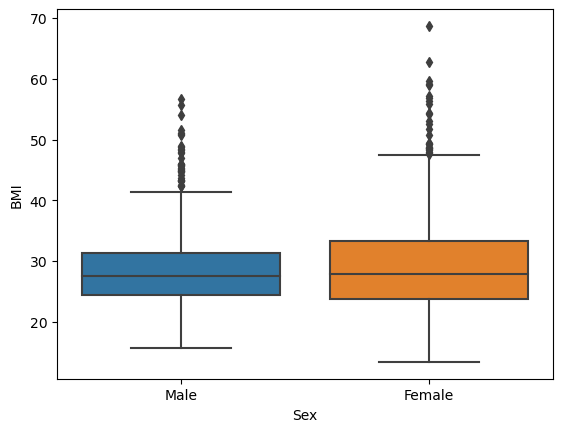

In [18]:
sns.boxplot(x= 'Sex', y='BMI', data= df)

###Females have a higher BMI than males with more BMI outliers in the female sex.

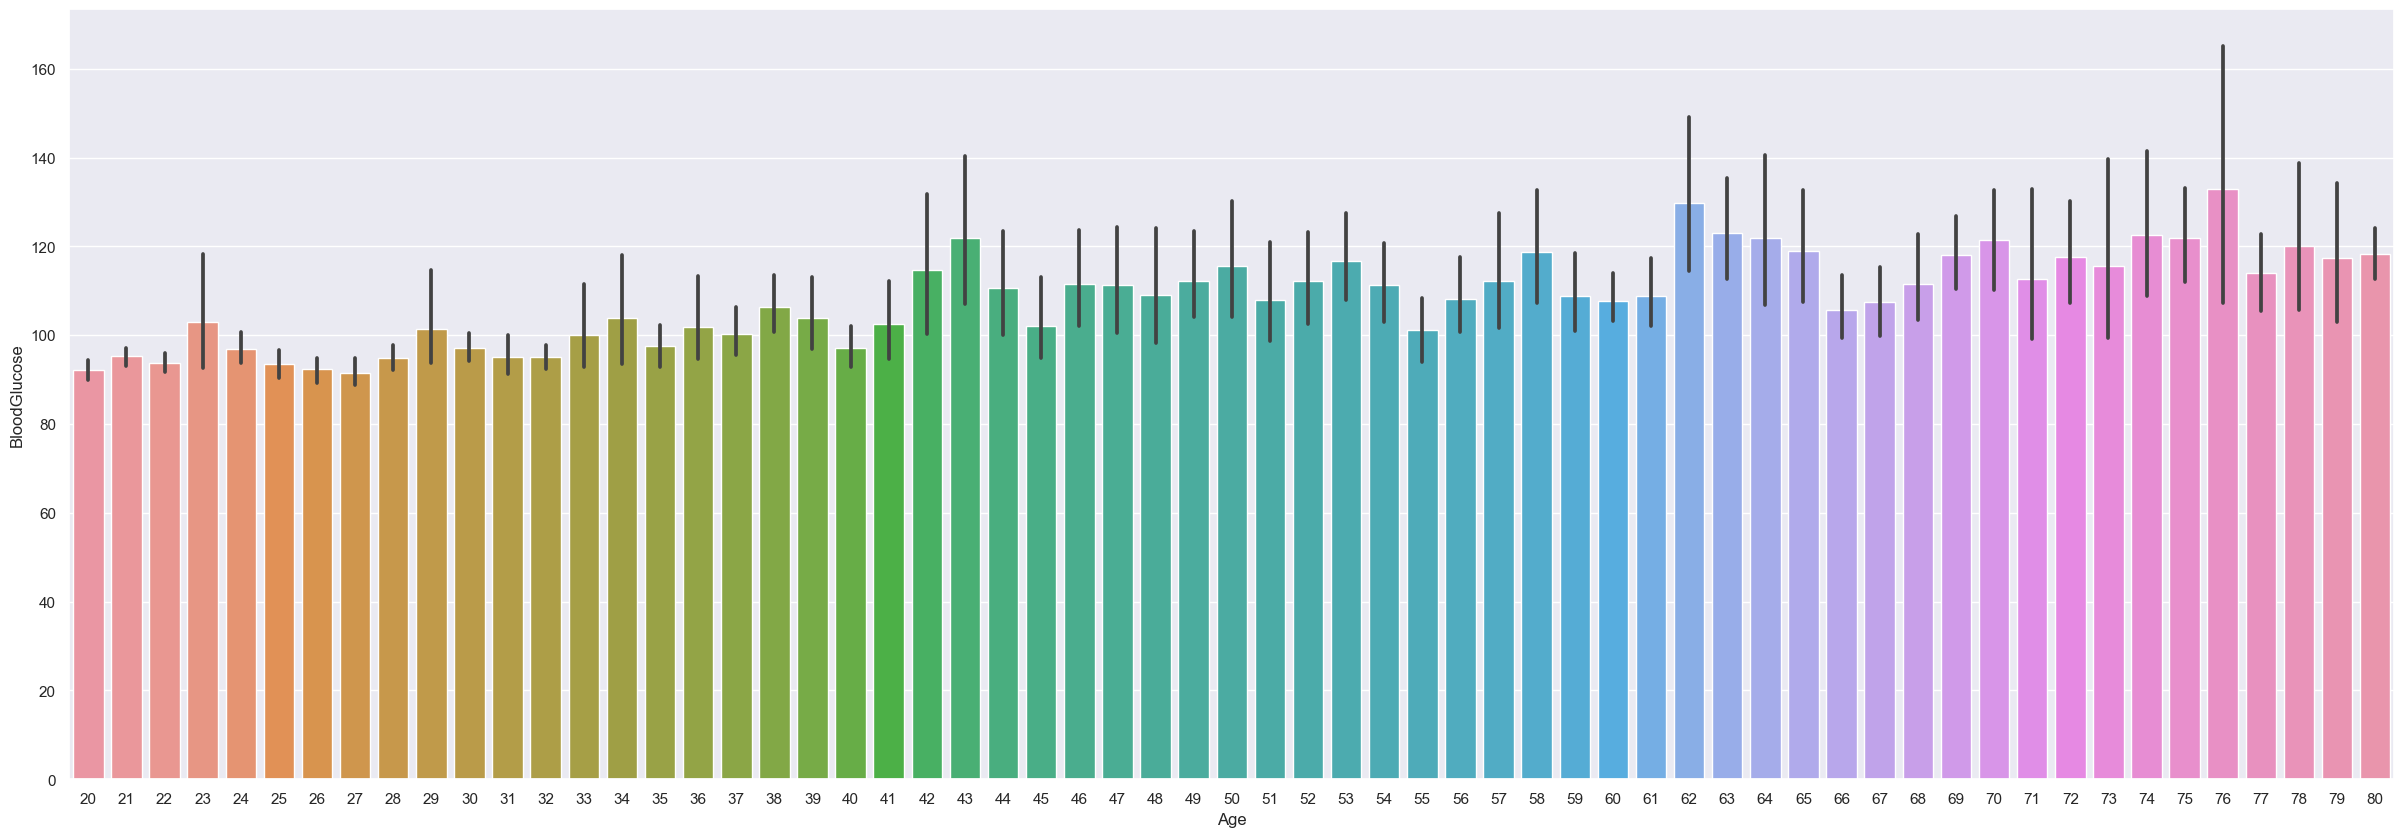

In [19]:
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=df, x= 'Age', y= 'BloodGlucose');

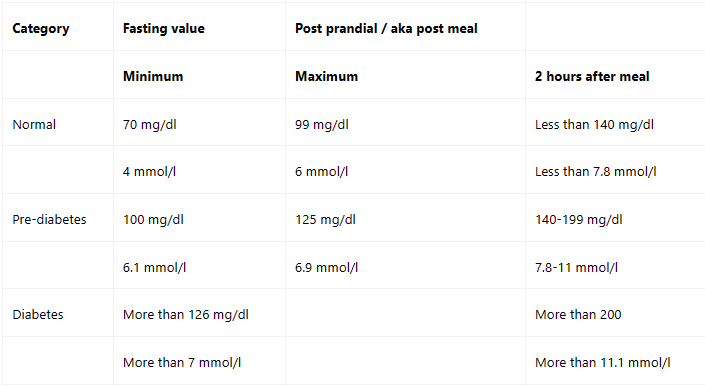

###Comparing the Bar graft with the Chart you can see that most of the people on the list had diabetes or were prediabetics. Informational chart sourced from diabeticmealsplans.com (https://diabetesmealplans.com/5080/diabetes-blood-sugar-levels-chart-printable/) 

# Part 3

<AxesSubplot: >

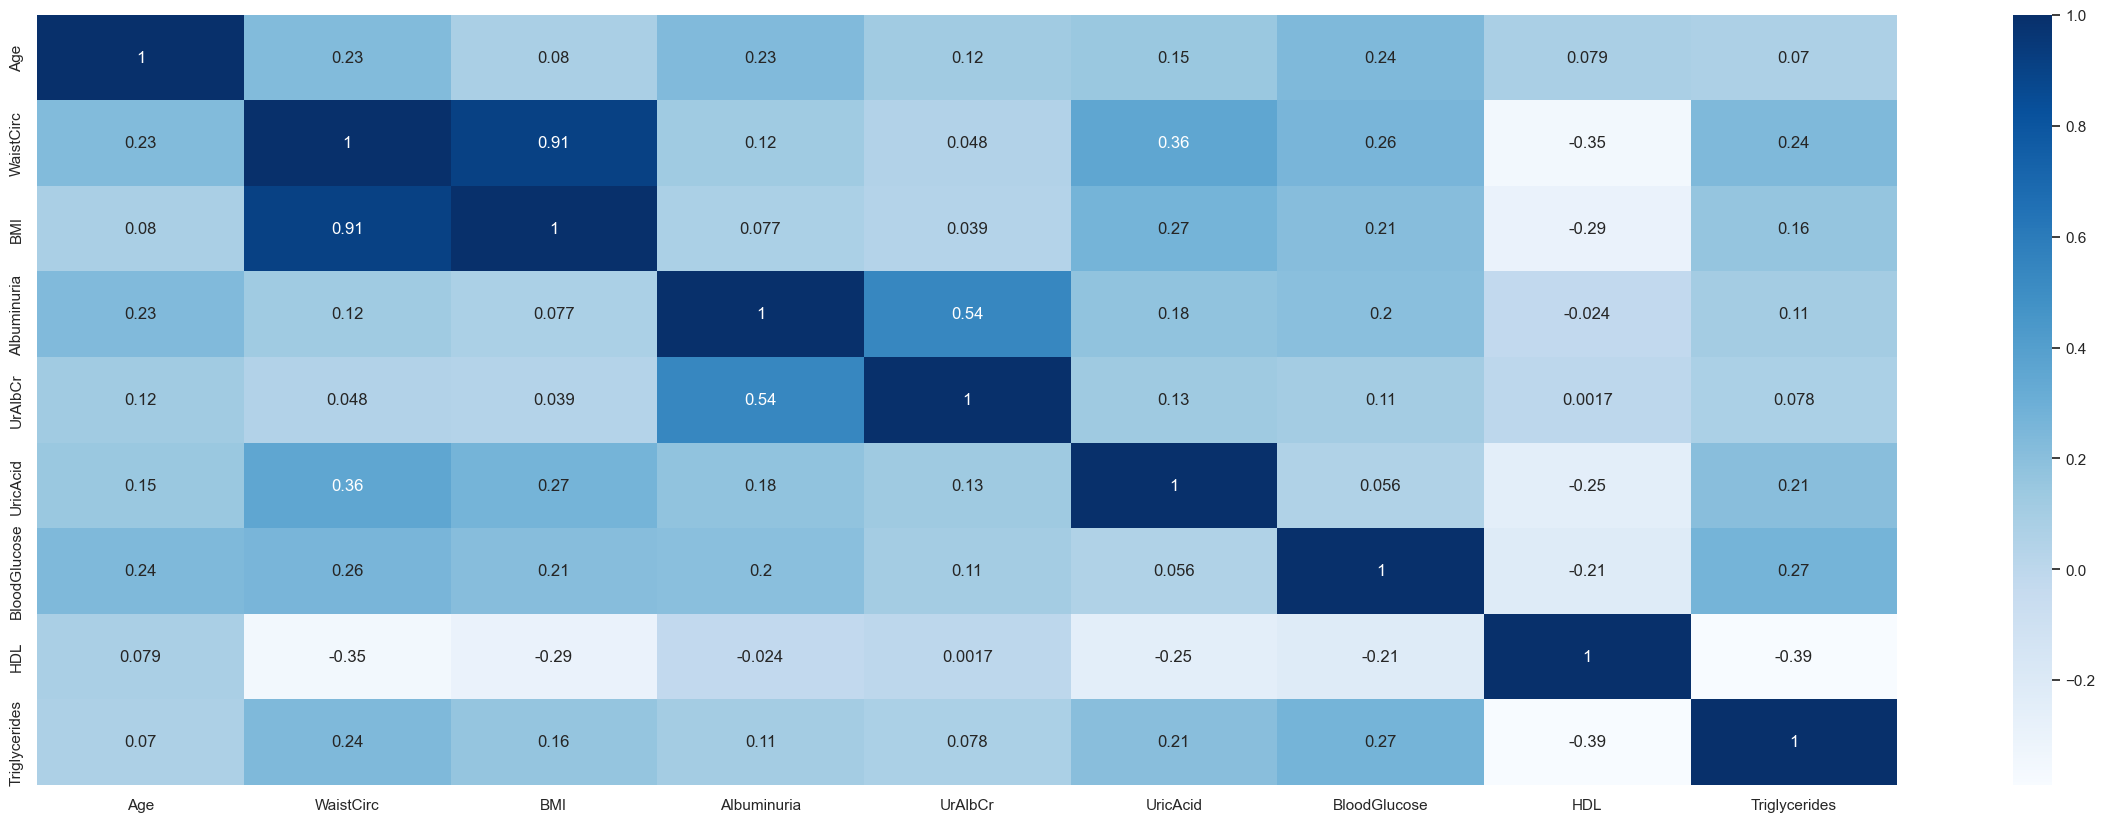

In [20]:
meta =df.corr()
sns.heatmap(meta, annot=True, cmap= 'Blues')

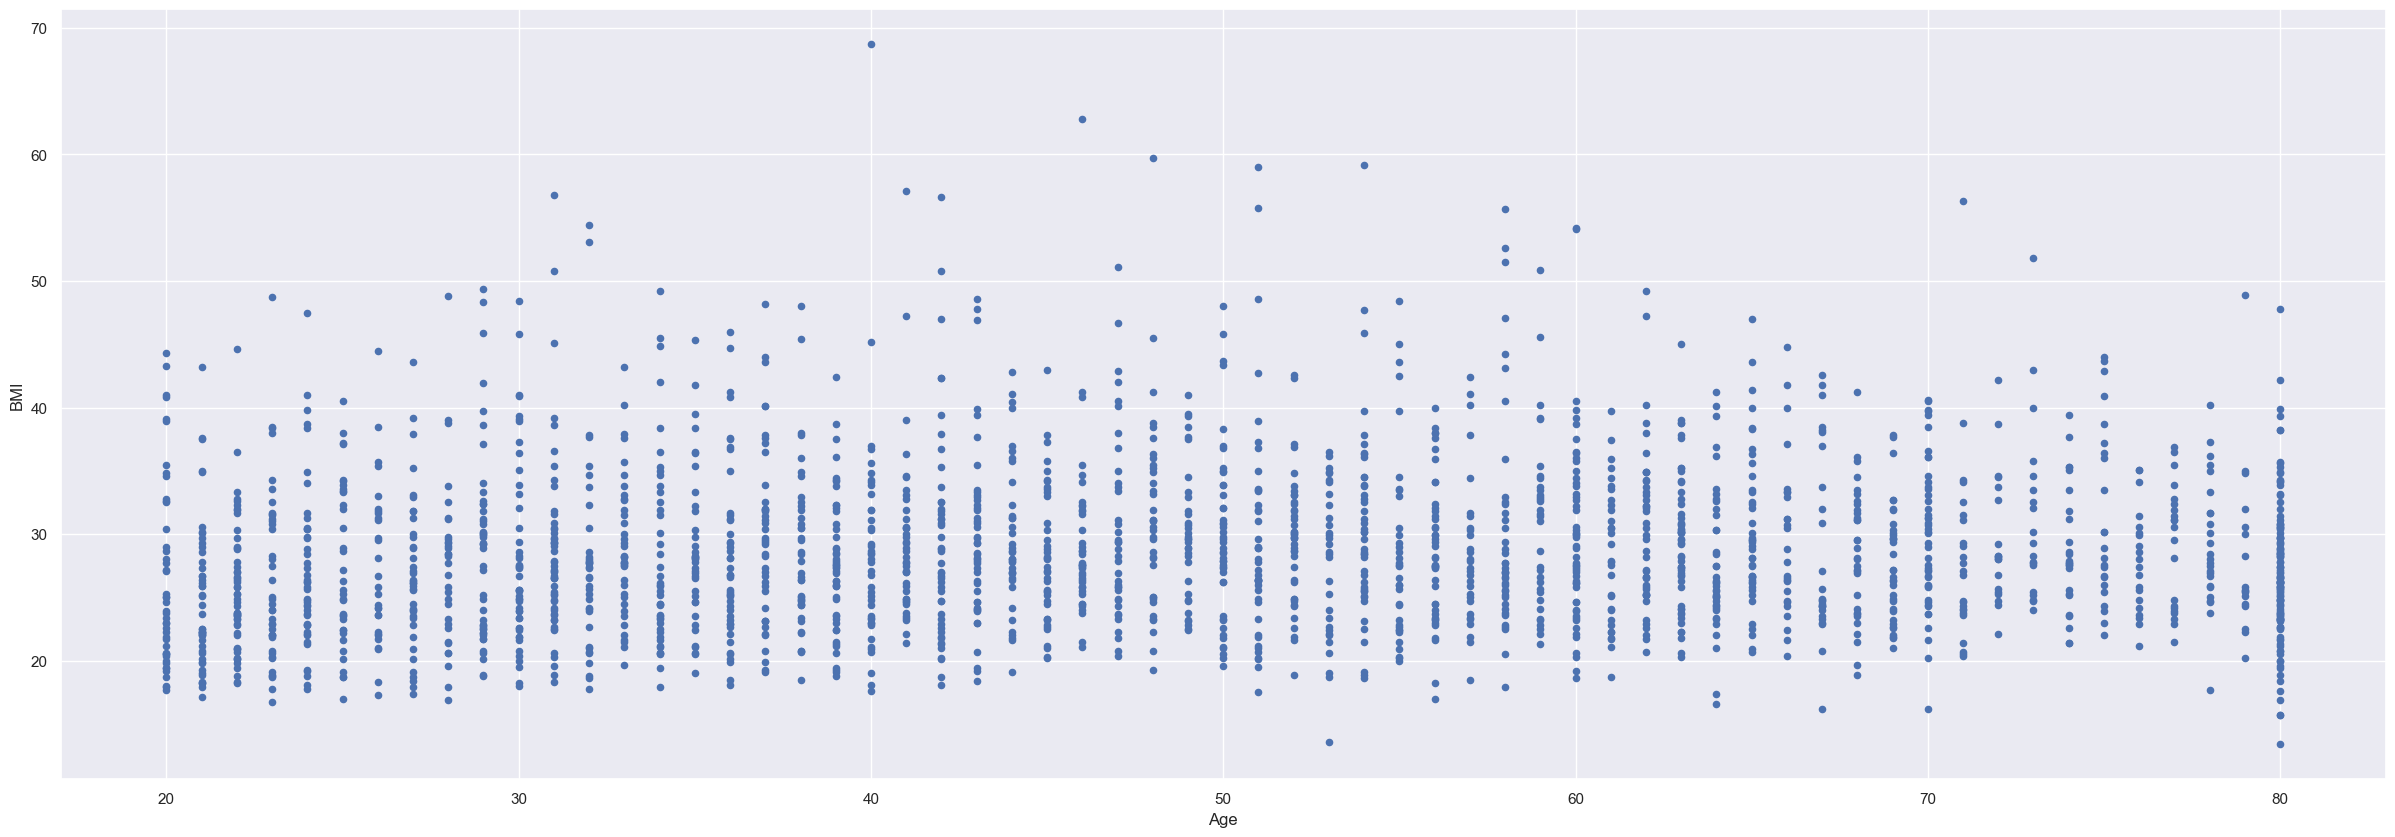

In [21]:
df.plot(kind='scatter', x='Age',y='BMI', grid=True)
plt.show()

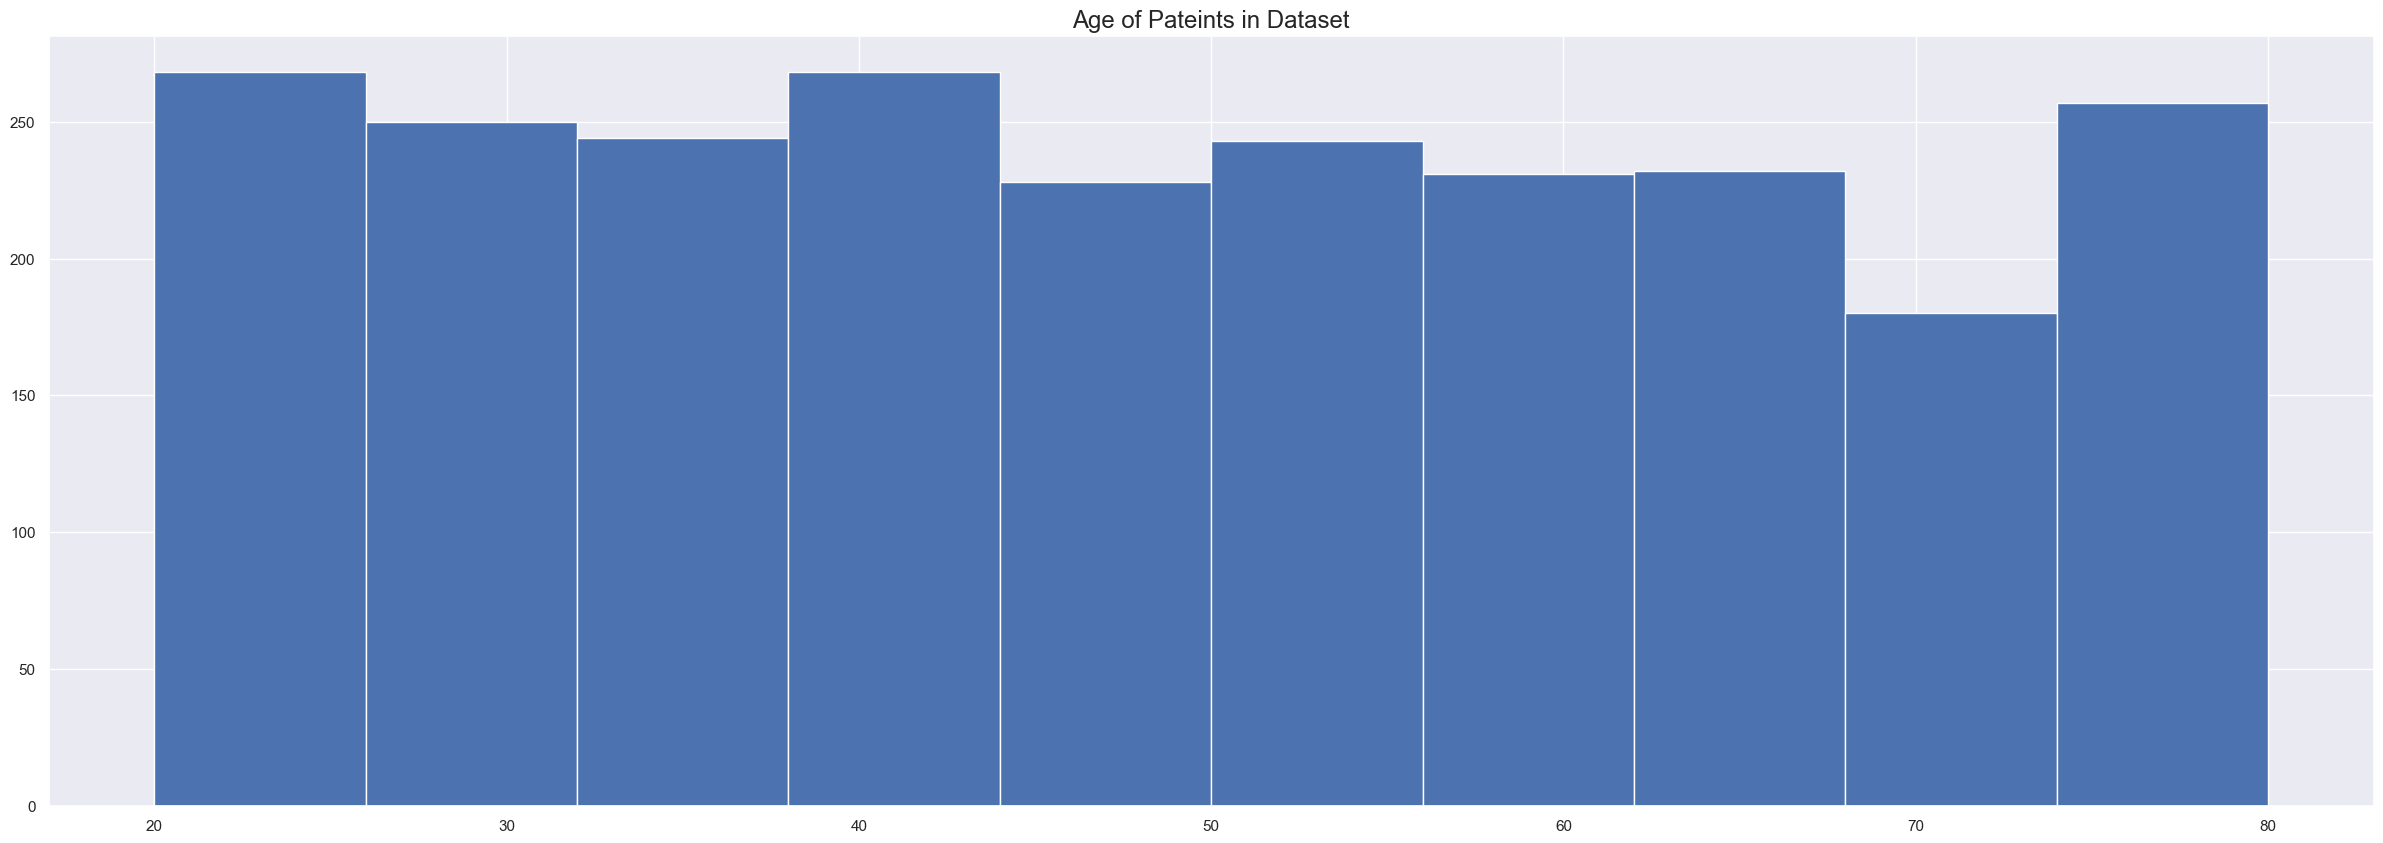

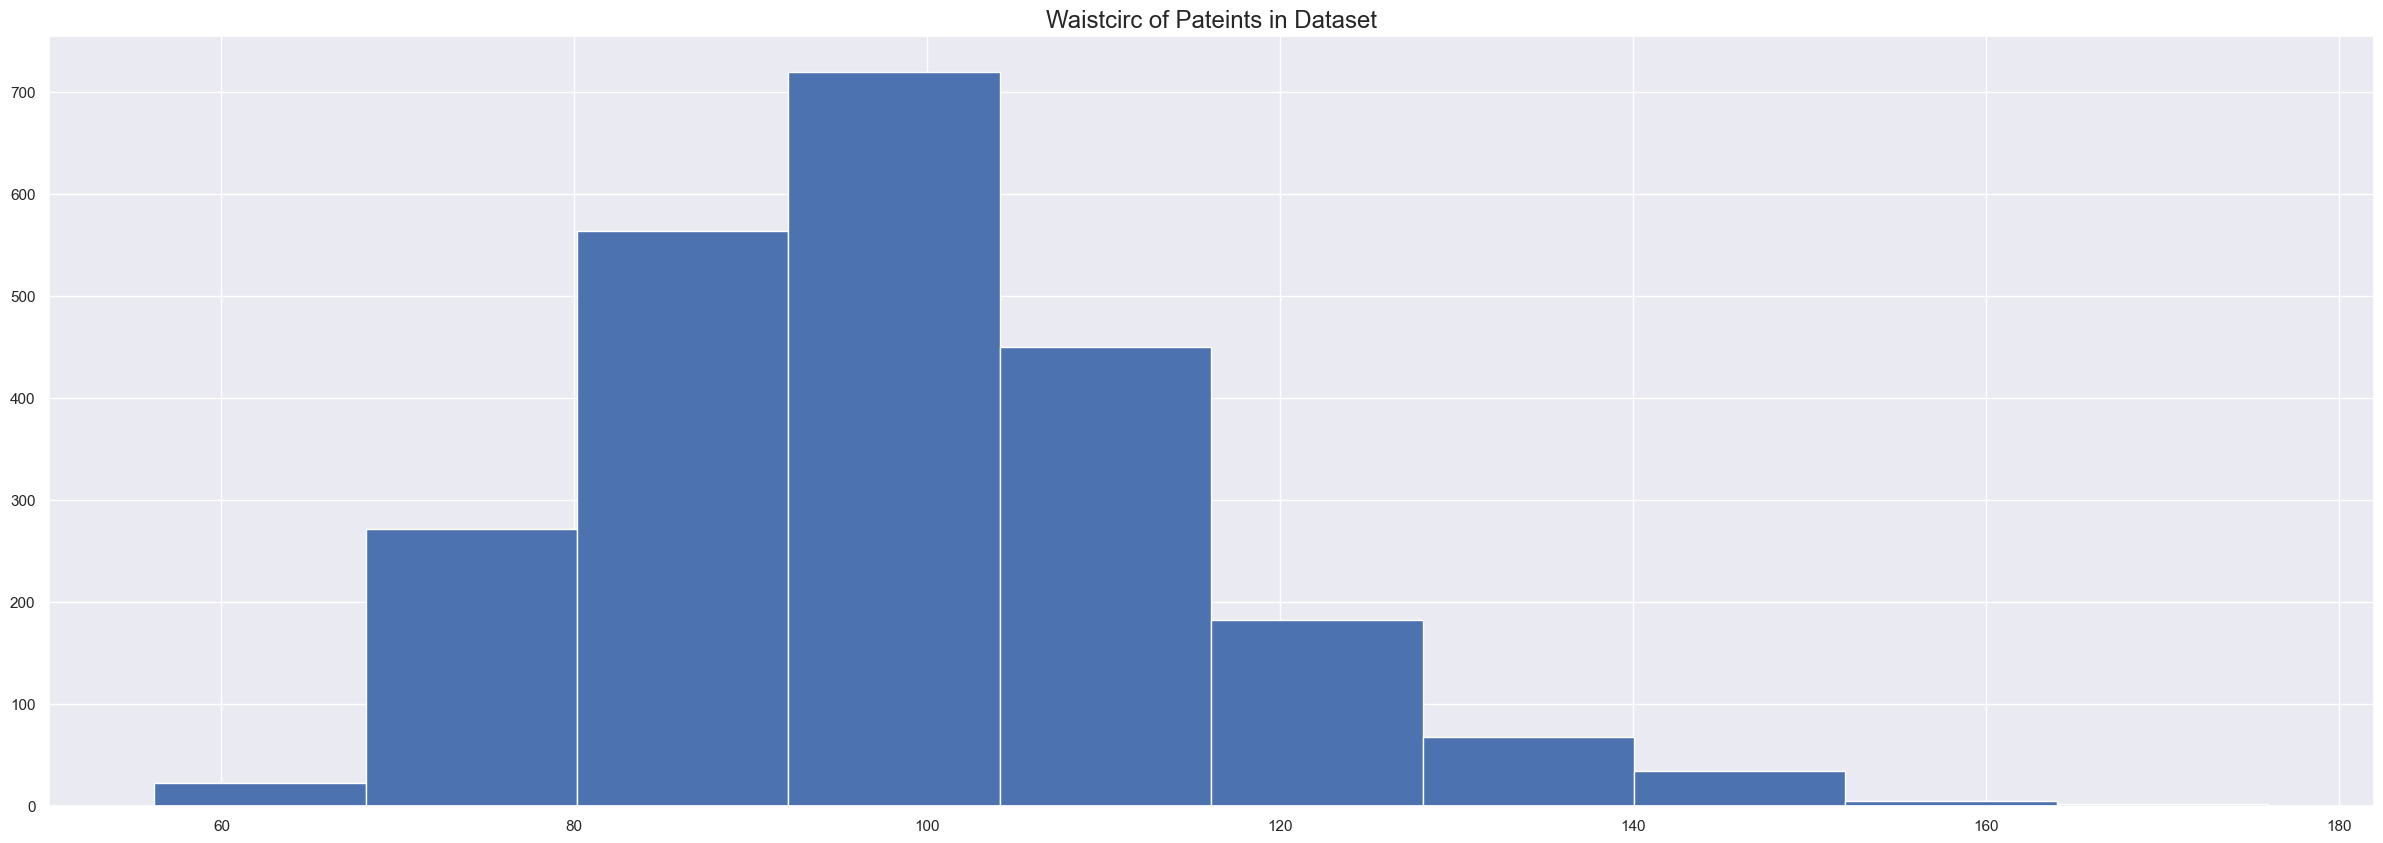

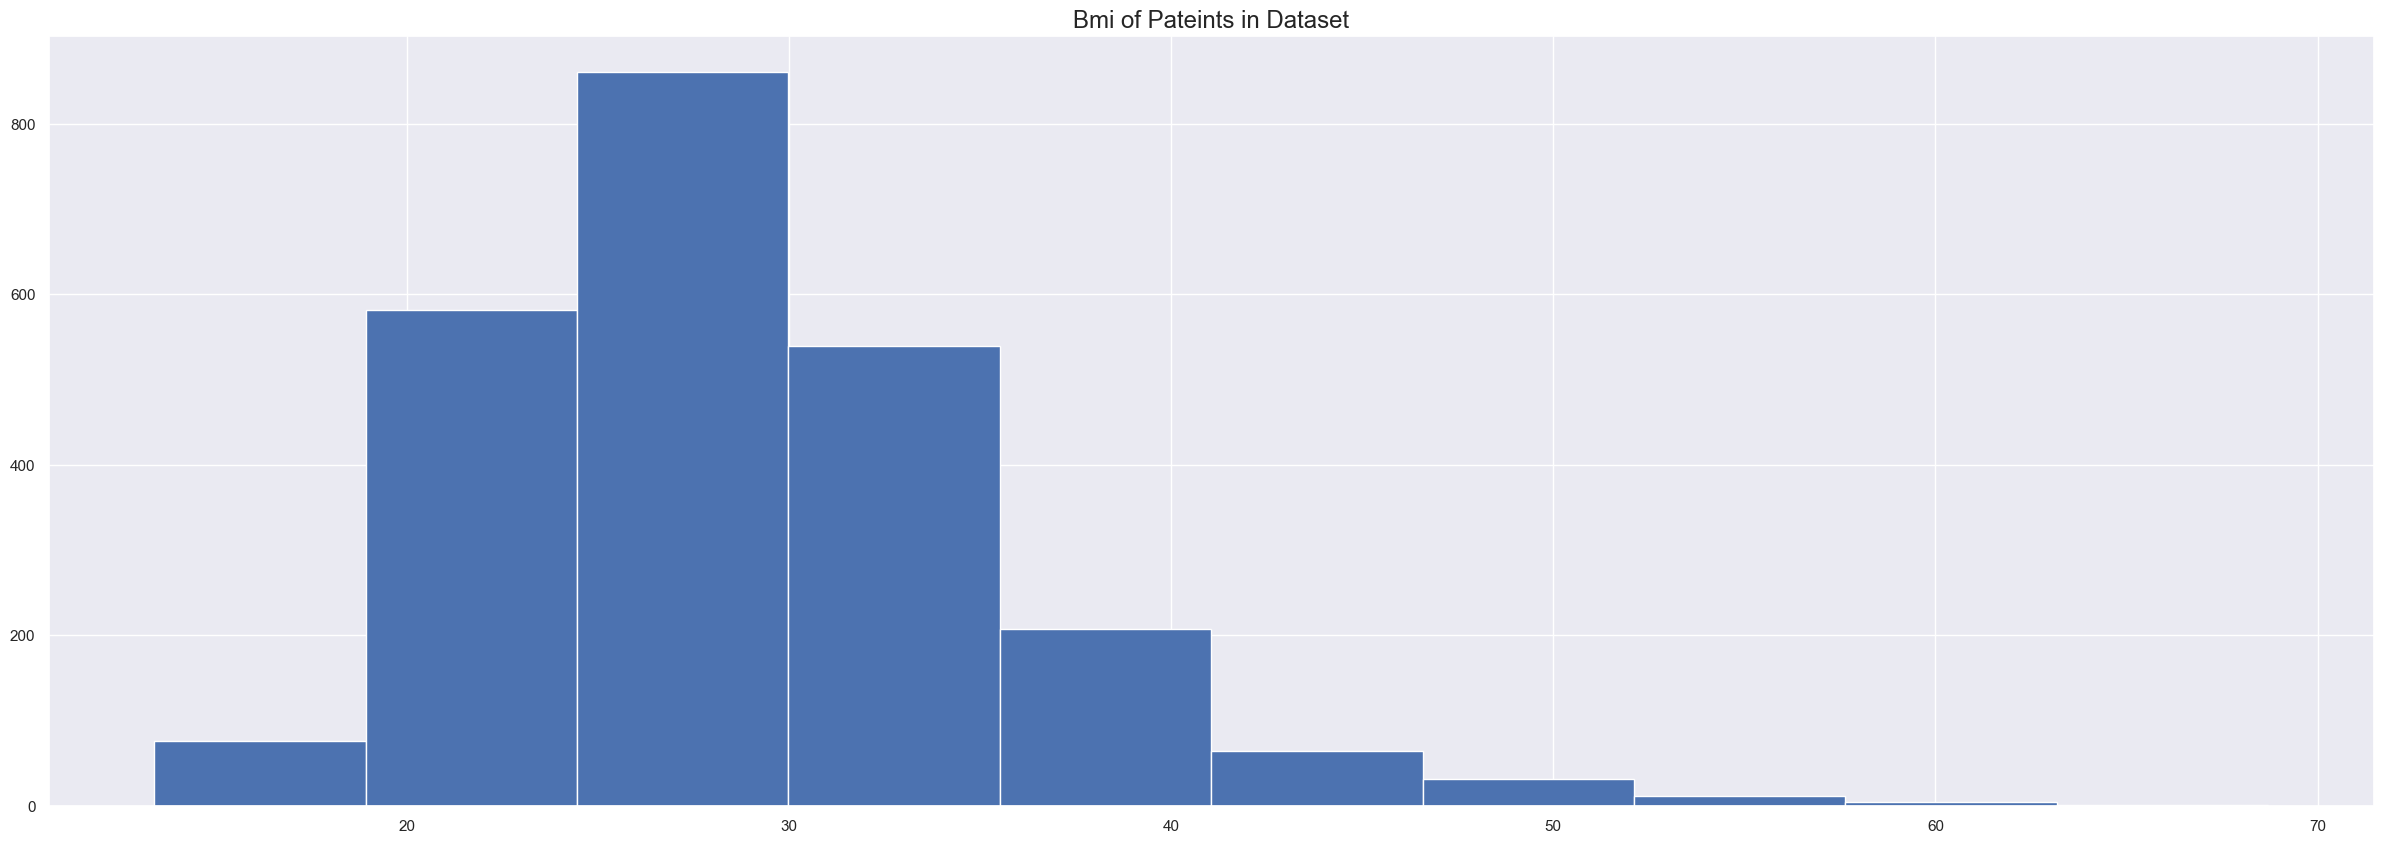

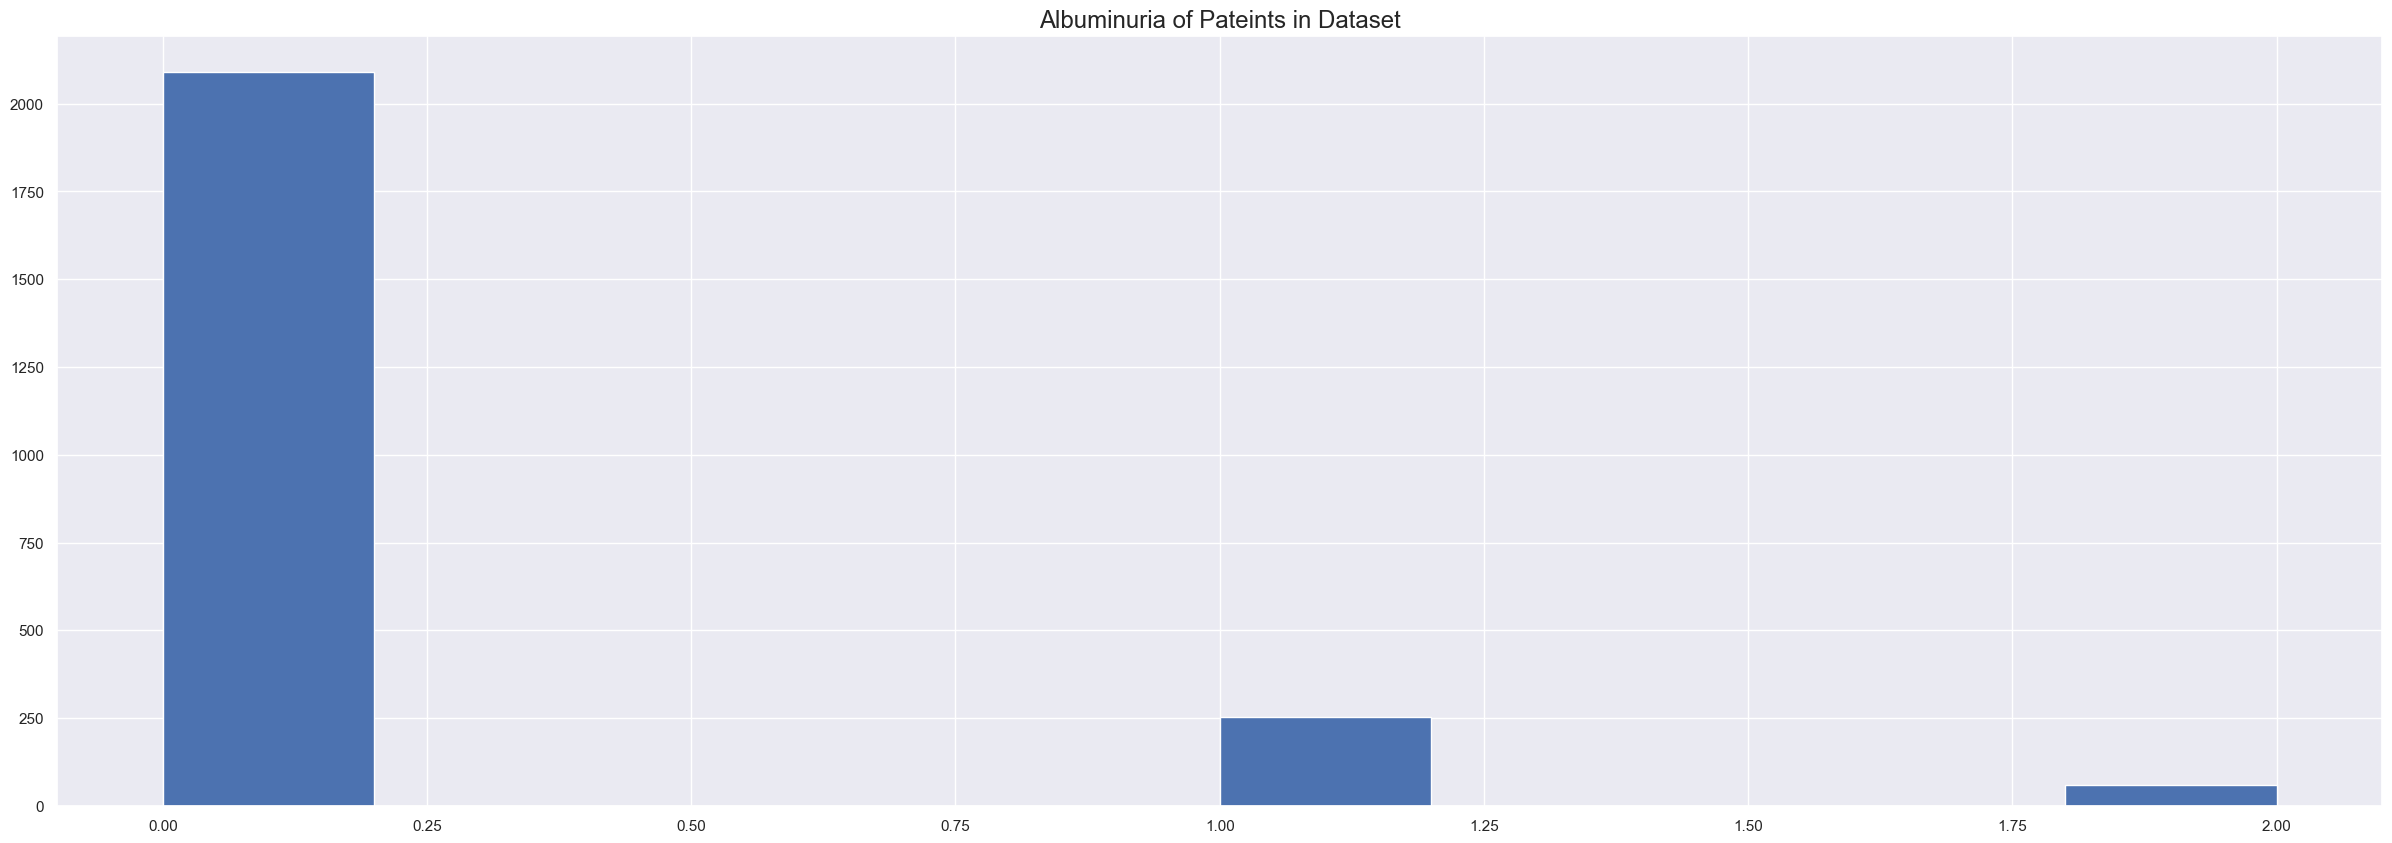

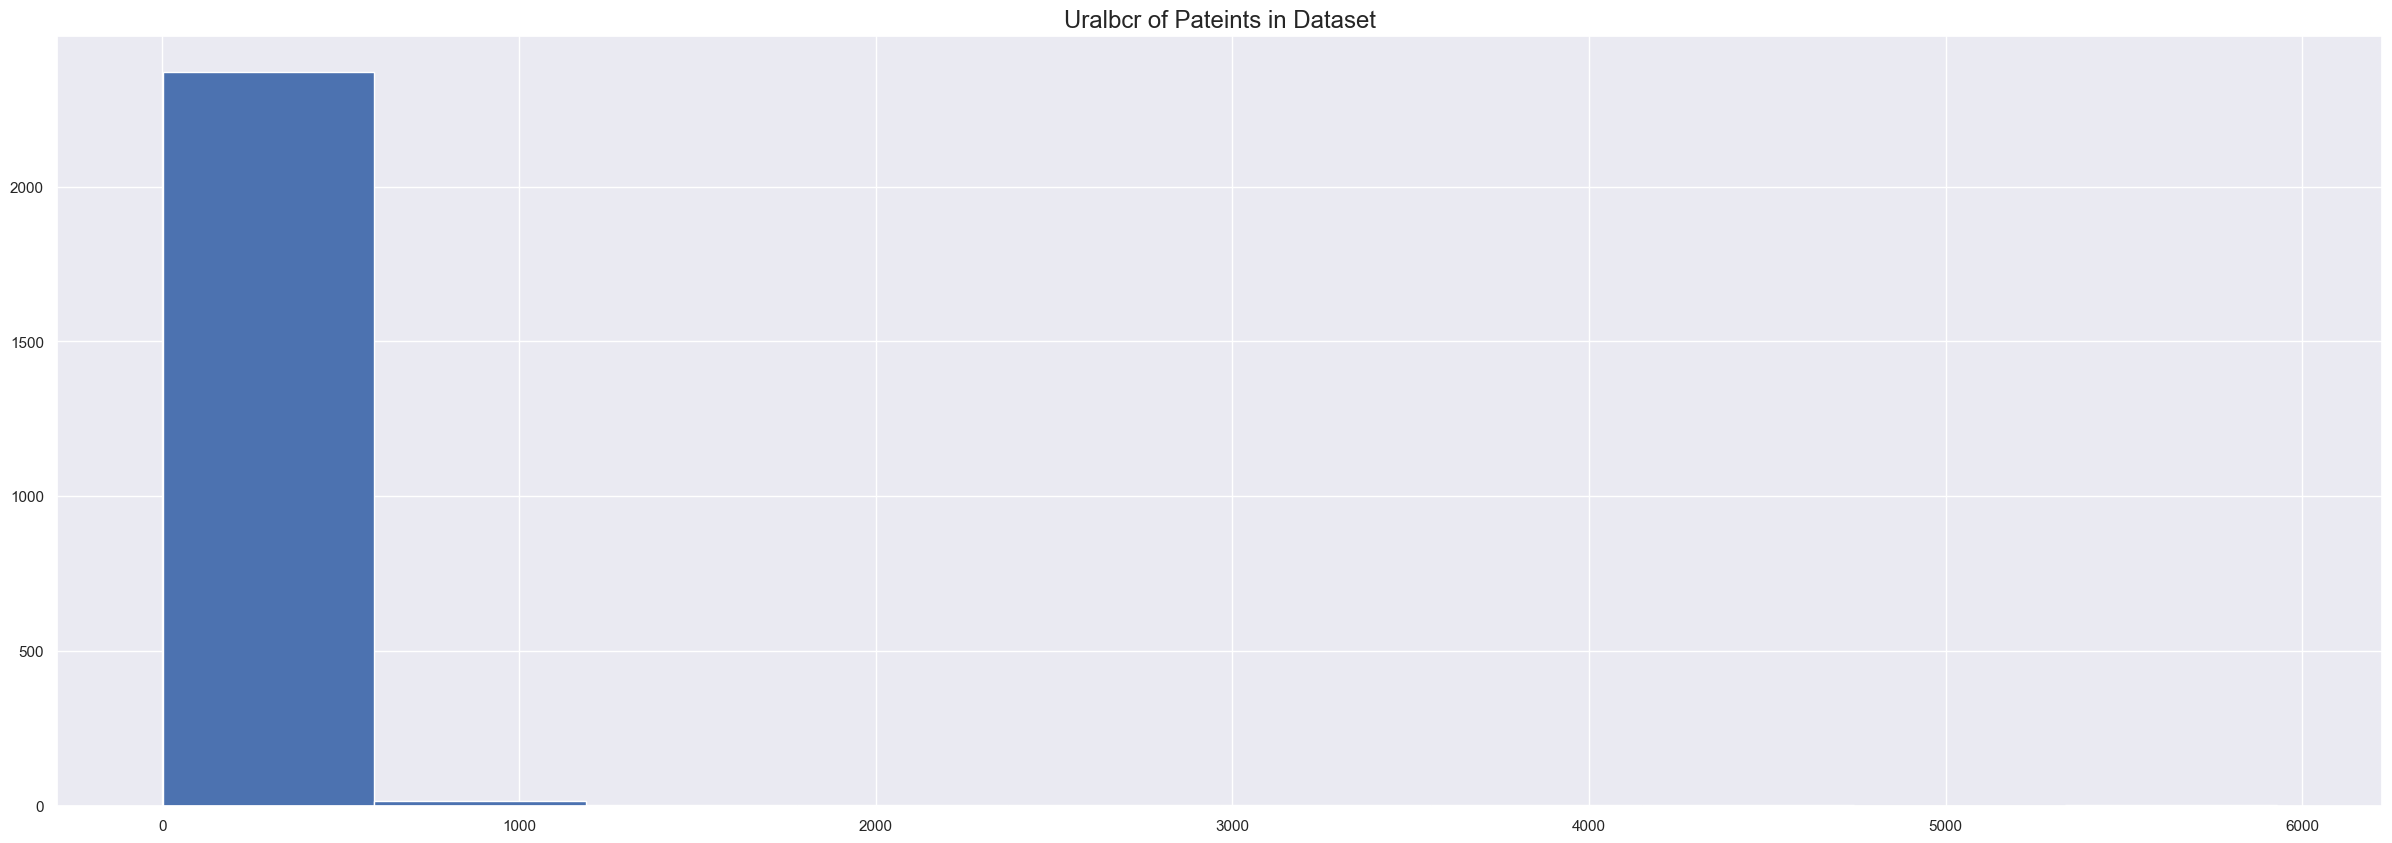

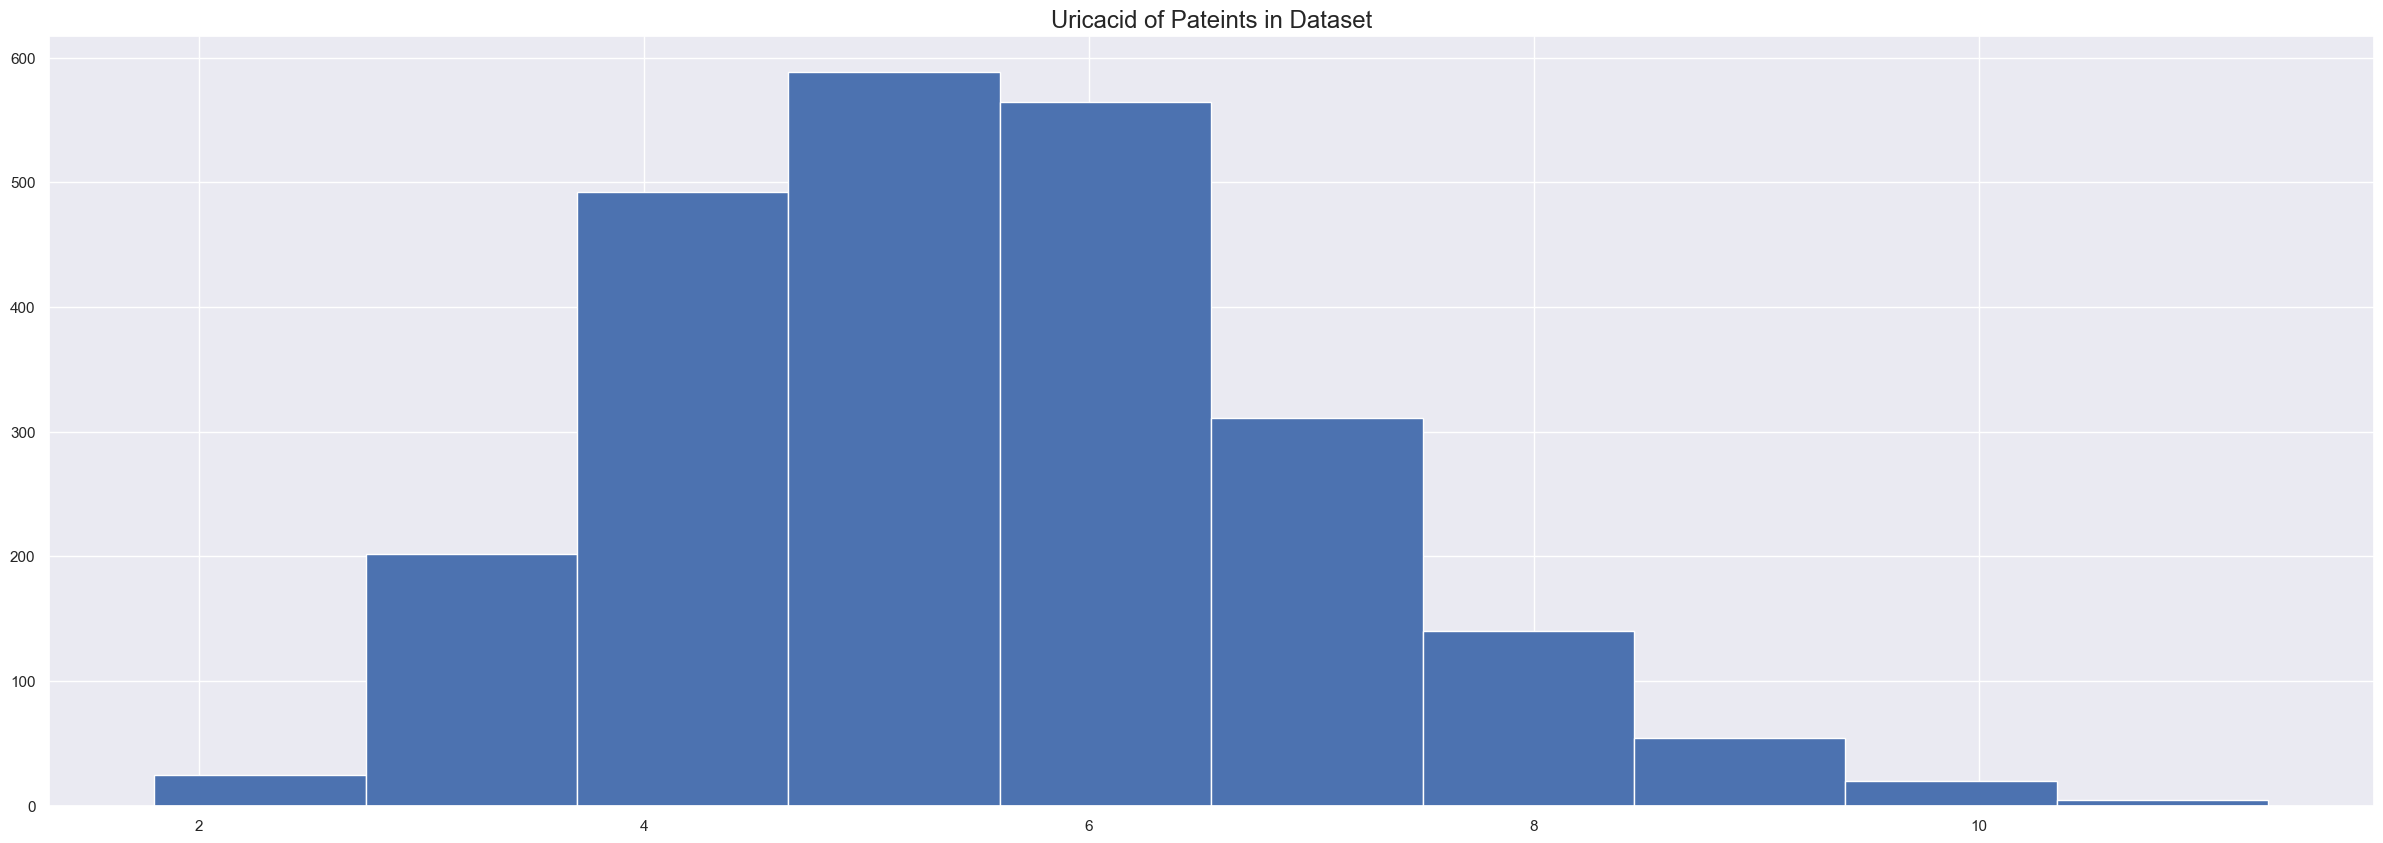

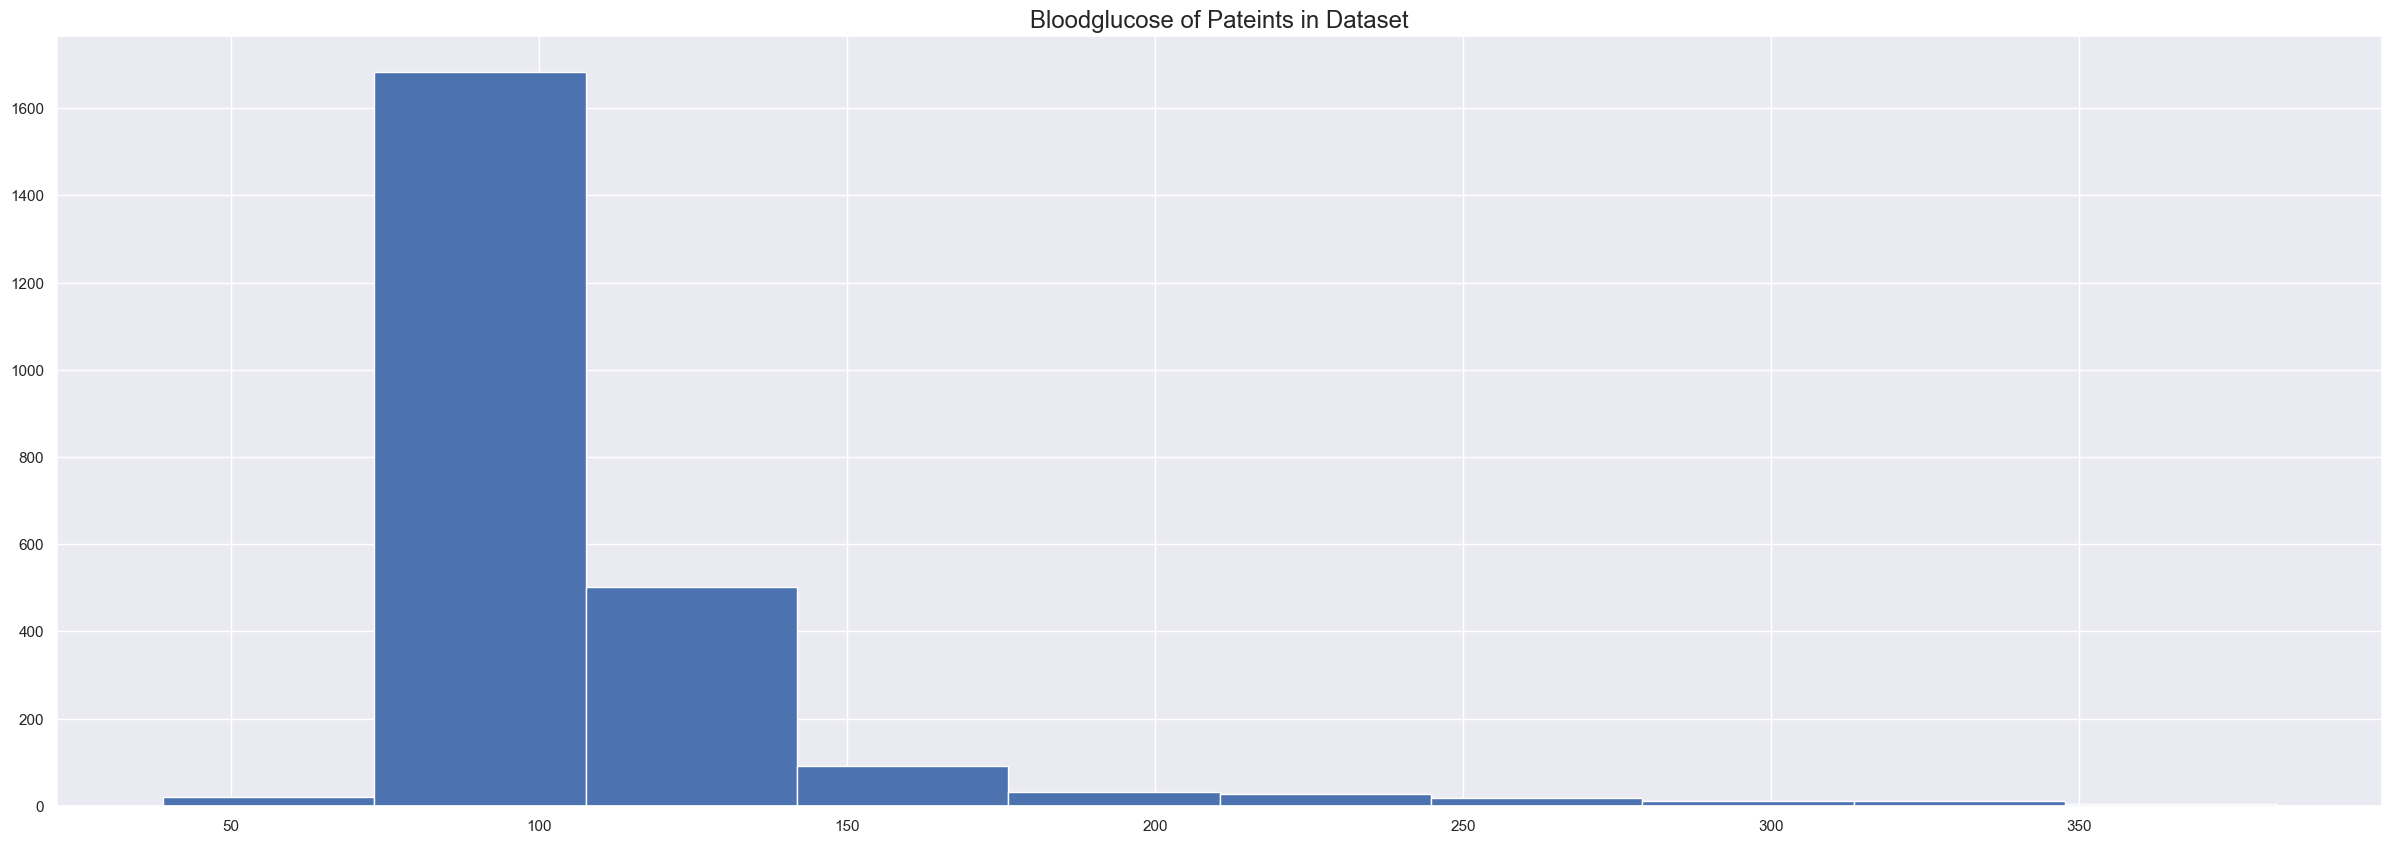

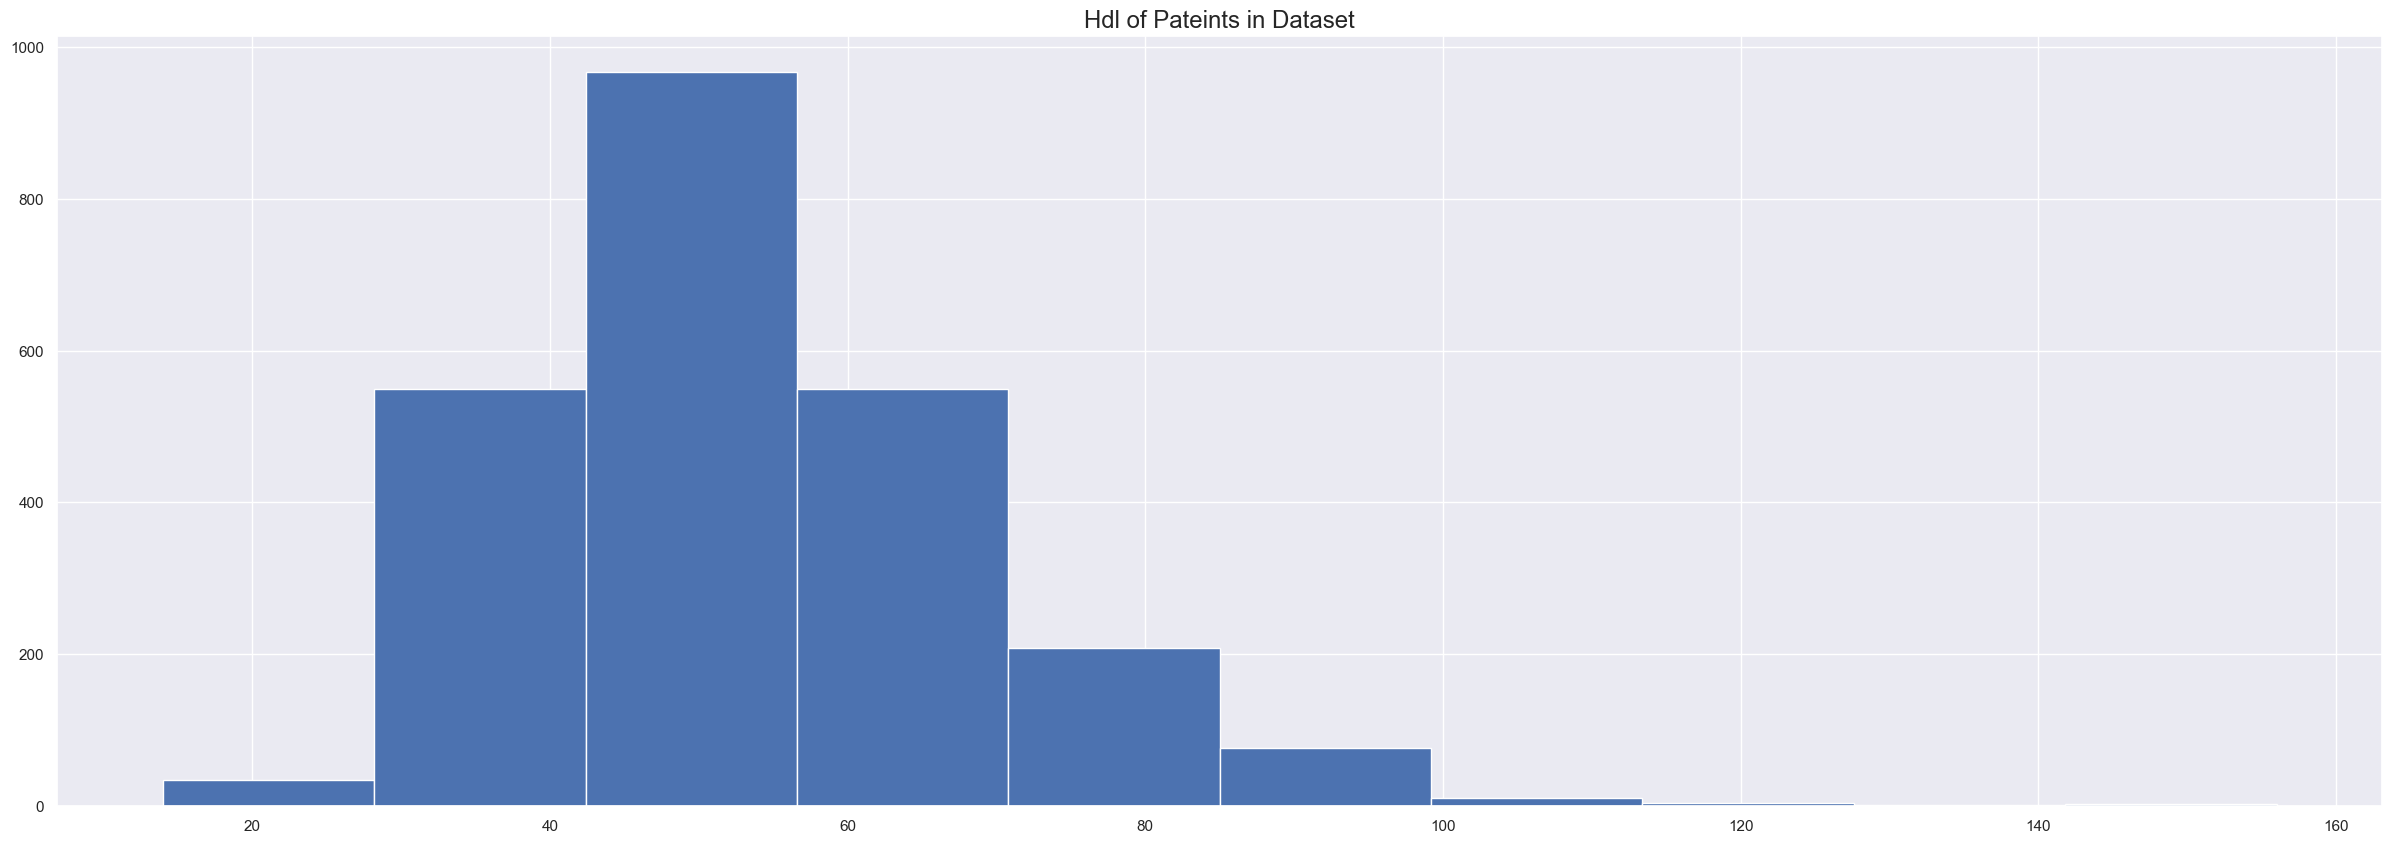

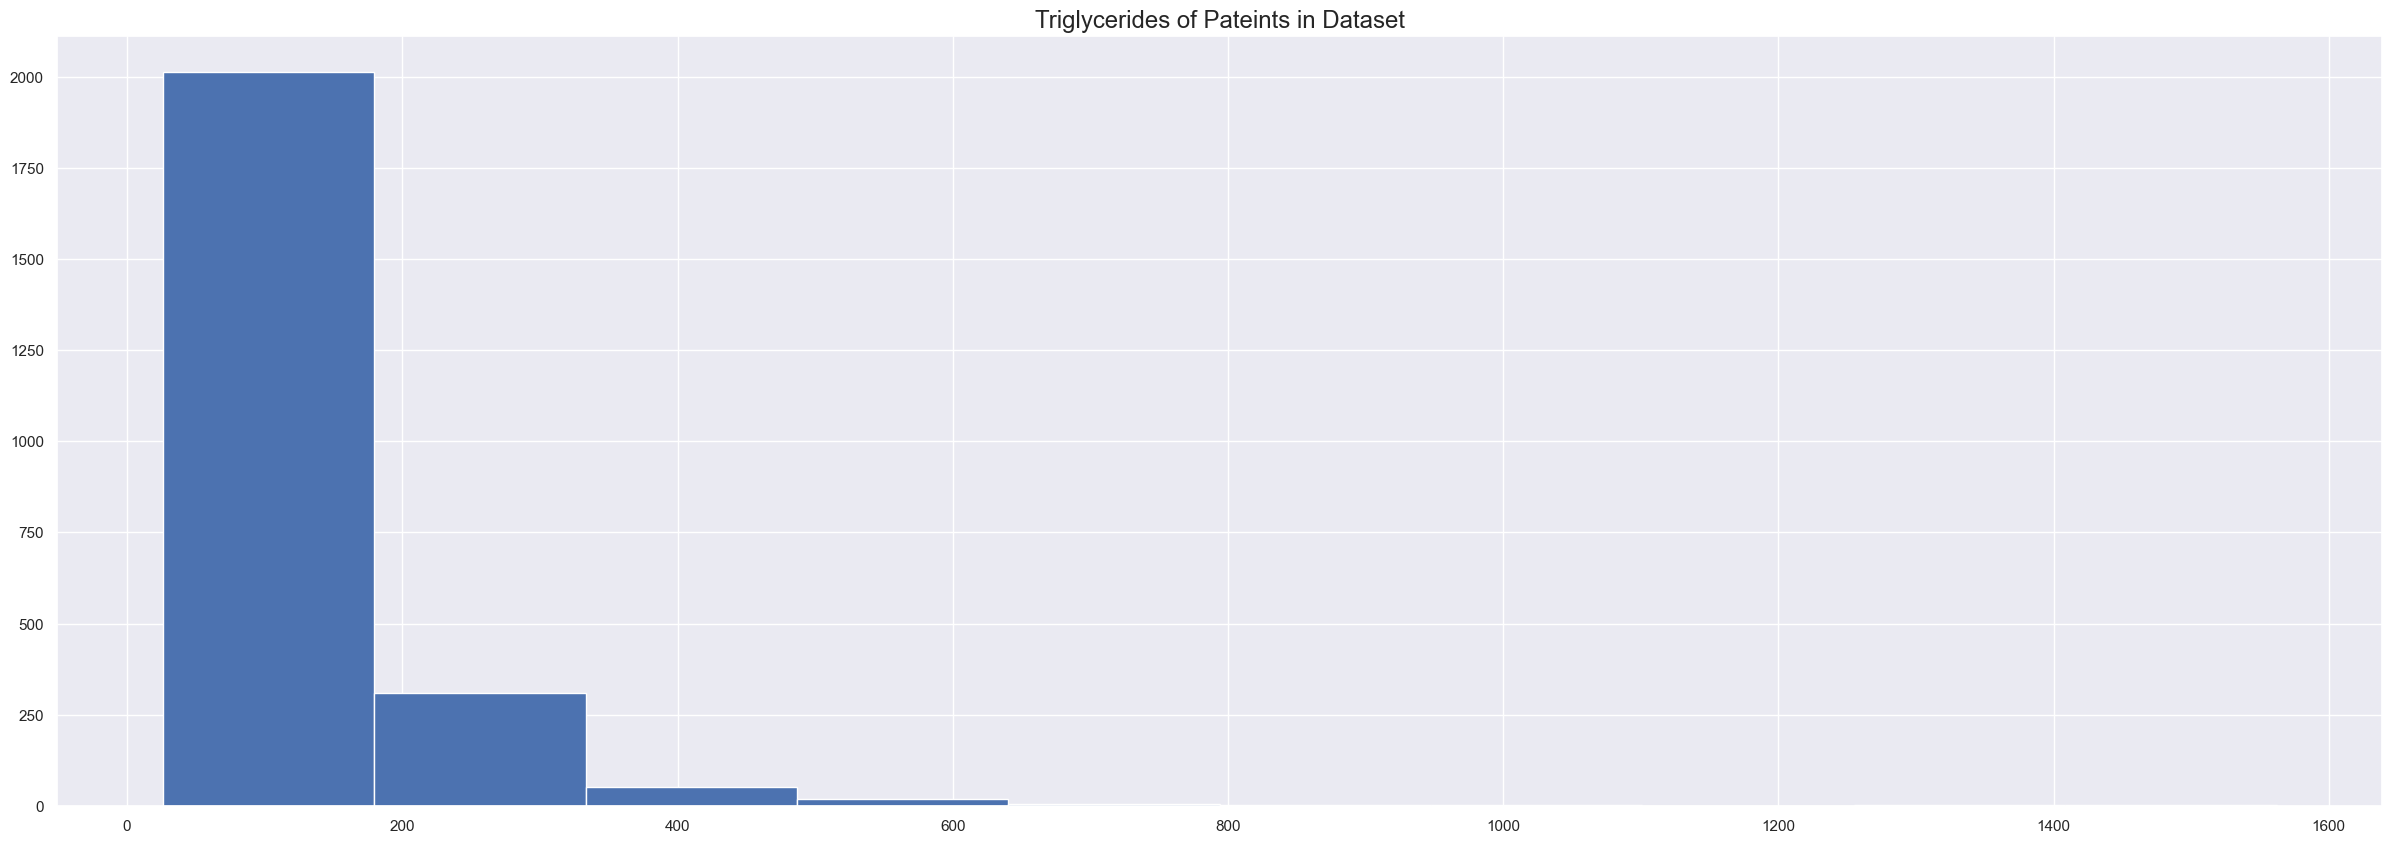

In [22]:
for col in df.select_dtypes('number'):
    plt.title(col.capitalize() + ' of Pateints in Dataset', fontsize="x-large")
    df[col].hist()
    plt.show()

### When looking at the scatter and confusion grafts you can see a relative correlation between the HDL, Triglycerides and BMI. The scatter plot is giving you the visuals of where the individuals in this study land with their blood levels. While the correlatioon graft gives you a visiual of the indivials points in the graft and how they affect each other feature.

### I did a bit of investigating to figure out what most of these abbreviations are, so let me share with you all. Starting from the lower right, Tryglycerides is a tytpe of fat in your blood. If you have to much it will lead to heart desease. 
### HDL is High-density lipoprotein this is the good fat you want in your blood and take the bad LDL fat to the liver to break it down and be removed from the blood. You want this amount to be just right at 40–59 mg/dl. to little or to high will cause strokes, heart desease and diabetes. Which is why we are here. 
### Blood Glucose is the amount of sugar in your blood. This is another amount that need to be in a range. For Blood Glucose this is 50 to 99 mg/dL and is the primary way patients are diagnosed with diabeties. A type 1 diabetic would have there own normal ranges but insulin would be a everyday medication for them. 
### BMI is the Body Mass Index which is the amount of fat you have in reference to weight and height. It is the quicks way to see if you are obese or skinny. Neither is great and we all deal with the social media images that dont help with our self image.
### All these test have a way of helping some one get the preimpted treatment before they get the disease.

# Part 4

### KNeighbors pipe, pramas, gridsearch and confusion matrix

In [23]:
knn = KNeighborsClassifier()

In [24]:
# Creating a KNN pipeline
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
# Checking what parameters are available
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F18E0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F1940>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose

In [25]:
# Creating param_grid
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1,5),
              'kneighborsclassifier__p': range(1,2),
              'kneighborsclassifier__weights': ['balanced', 'uniform']}

In [26]:
# Creating GridSearchCV
knn_pipe_gs = GridSearchCV(knn_pipe, knn_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters: ')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters: 
{'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8136439267886856


In [27]:
best_pipe.fit(X_train,y_train)
knn_pred = best_pipe.predict(X_test)

In [28]:
knn_train_score = best_pipe.score(X_train, y_train)
knn_test_score = best_pipe.score(X_test, y_test)
print(knn_train_score)
print(knn_test_score)

0.8827777777777778
0.8136439267886856


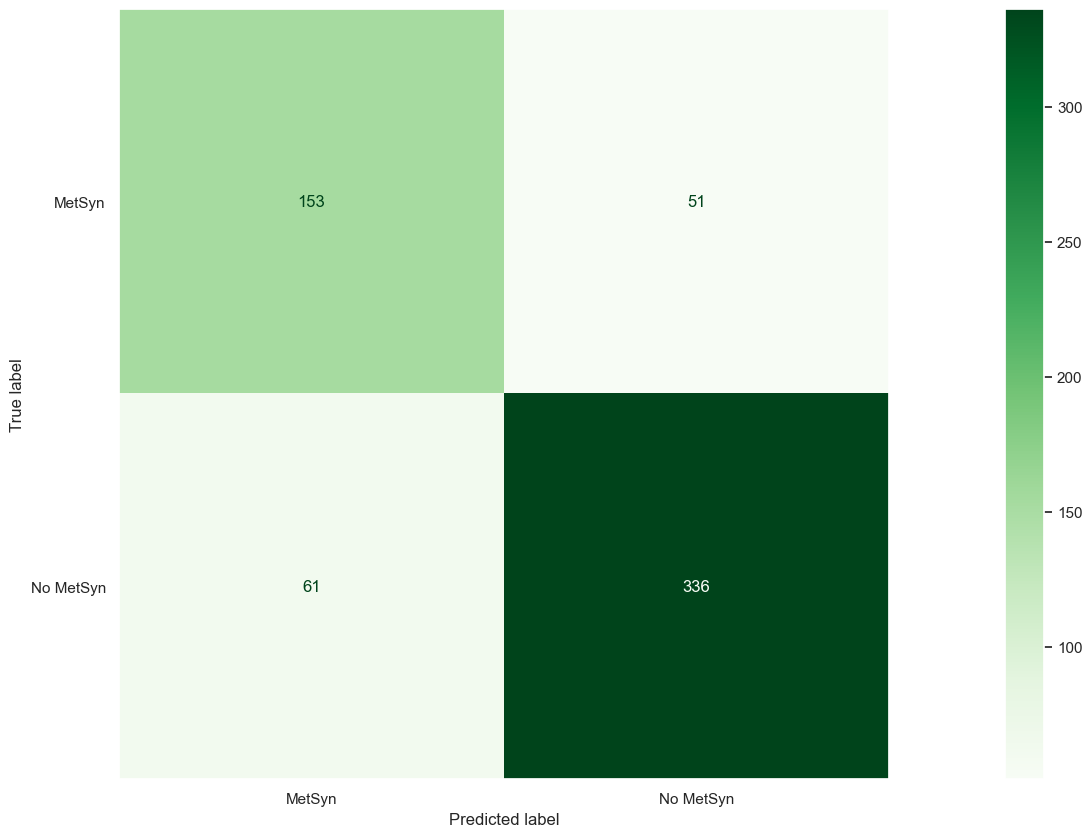

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_pipe, X_test, y_test, cmap='Greens')
plt.grid(False);

Cluster matrix

### Using PCA in data set

In [30]:
X.shape

(2401, 11)

In [31]:
shape_input = X_train.shape[1]

In [32]:
df = pd.DataFrame(data=np.random.normal (0, 1, (20, 10)))
pca = PCA ()
pca.fit (df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

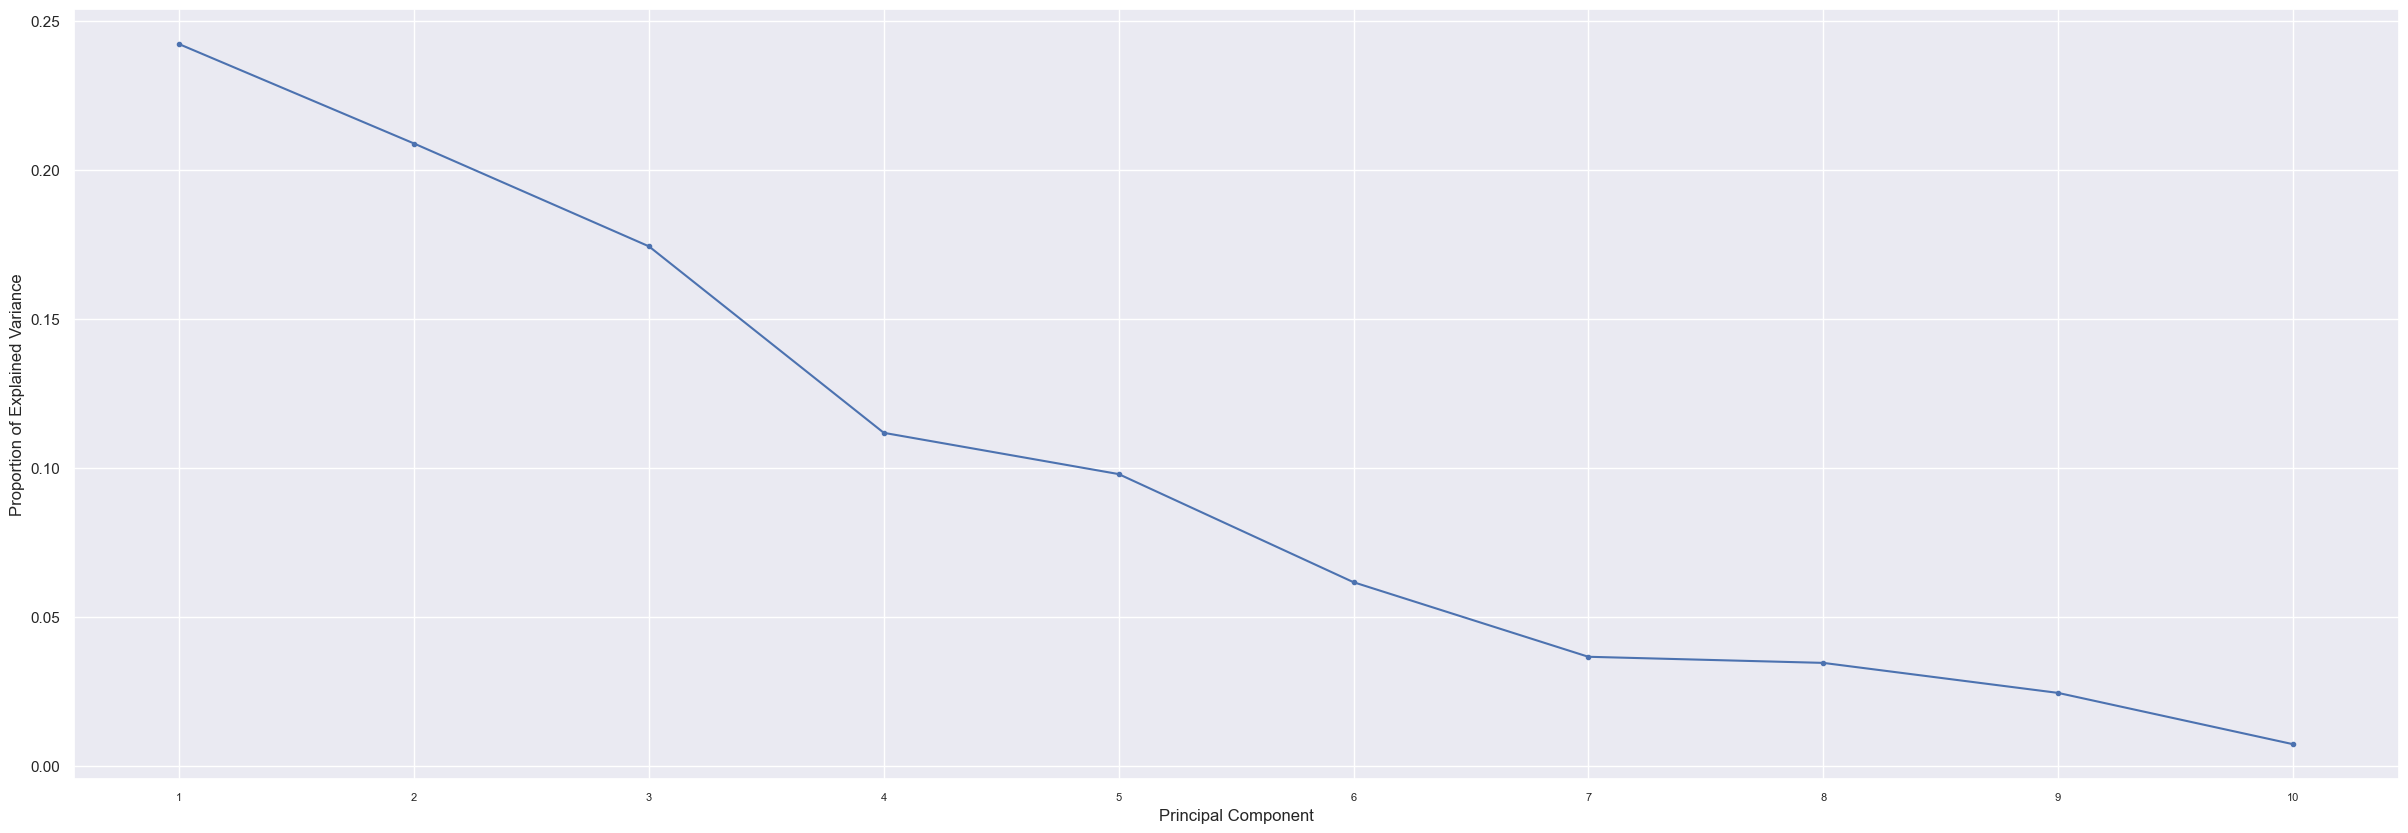

In [33]:
plt.plot(range(1,11),pca.explained_variance_ratio_[:df.shape[1]], marker = '.')
plt.xticks(ticks= range(1,11), fontsize= 8);
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

the best elbow to me is 4

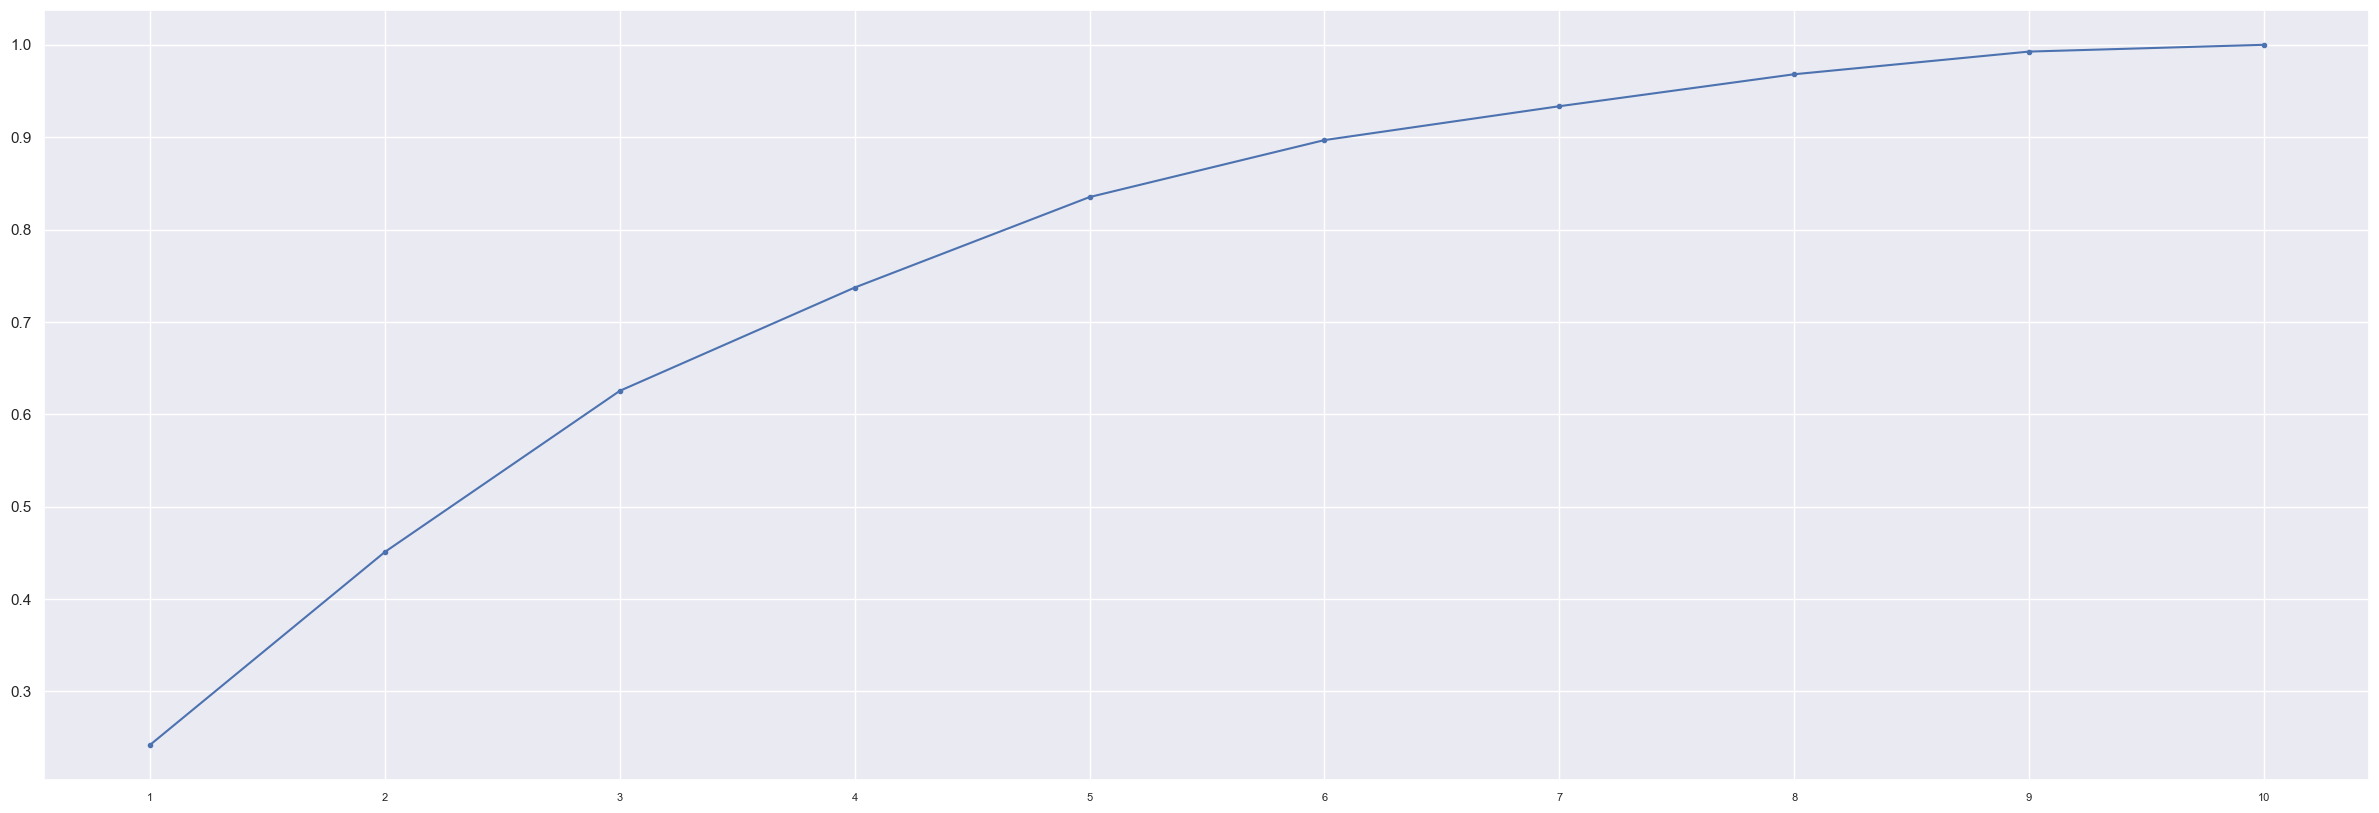

In [34]:
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,11), fontsize=8);

I believe in this graft 8 is better

In [35]:
pca8 = PCA(n_components=8)

### Random Forest Model

In [57]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F18E0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F1940>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [58]:
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [59]:
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.8685524126455907


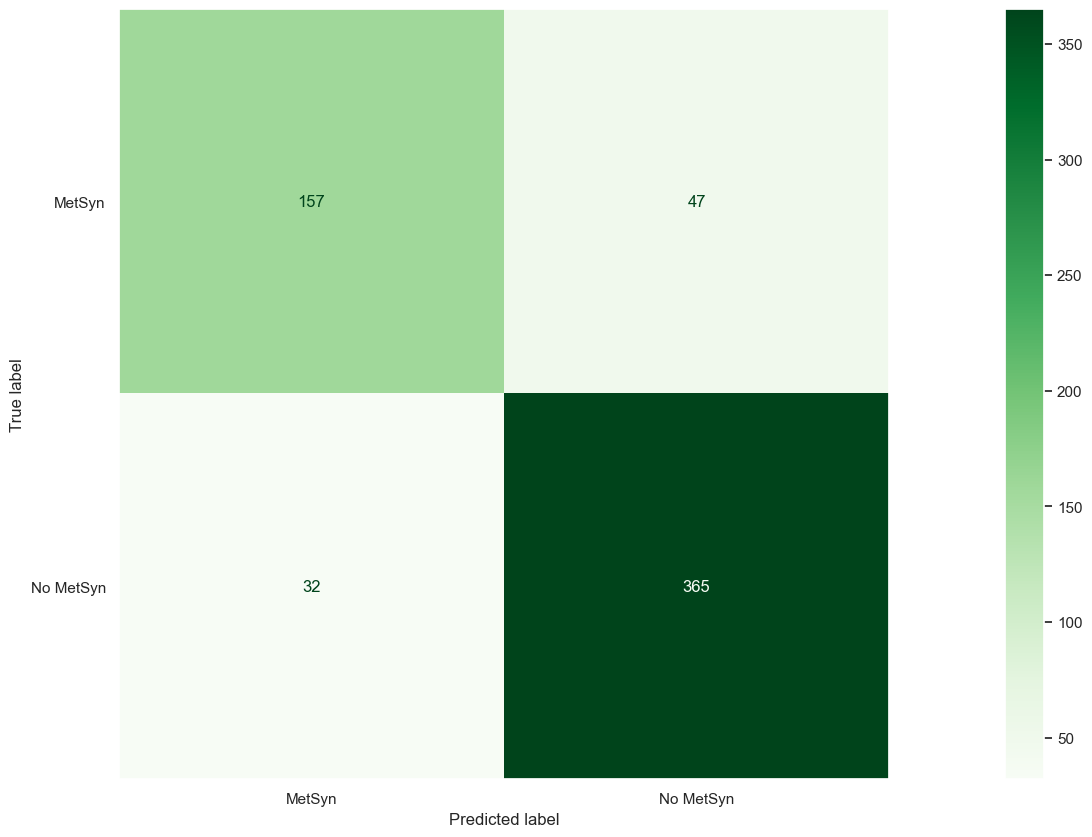

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_pipe, X_test, y_test, cmap='Greens')
plt.grid(False);

In [52]:
xgb= XGBClassifier()
boost_pipe= make_pipeline(preprocessor, xgb)
boost_pipe.fit(X_train, y_train)

[18:43:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FDF47F18E0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=F...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [45]:
xgb_train_score = boost_pipe.score(X_train, y_train)
xgb_test_score = boost_pipe.score(X_test, y_test)
print(xgb_train_score)
print(xgb_test_score)

1.0
0.8851913477537438


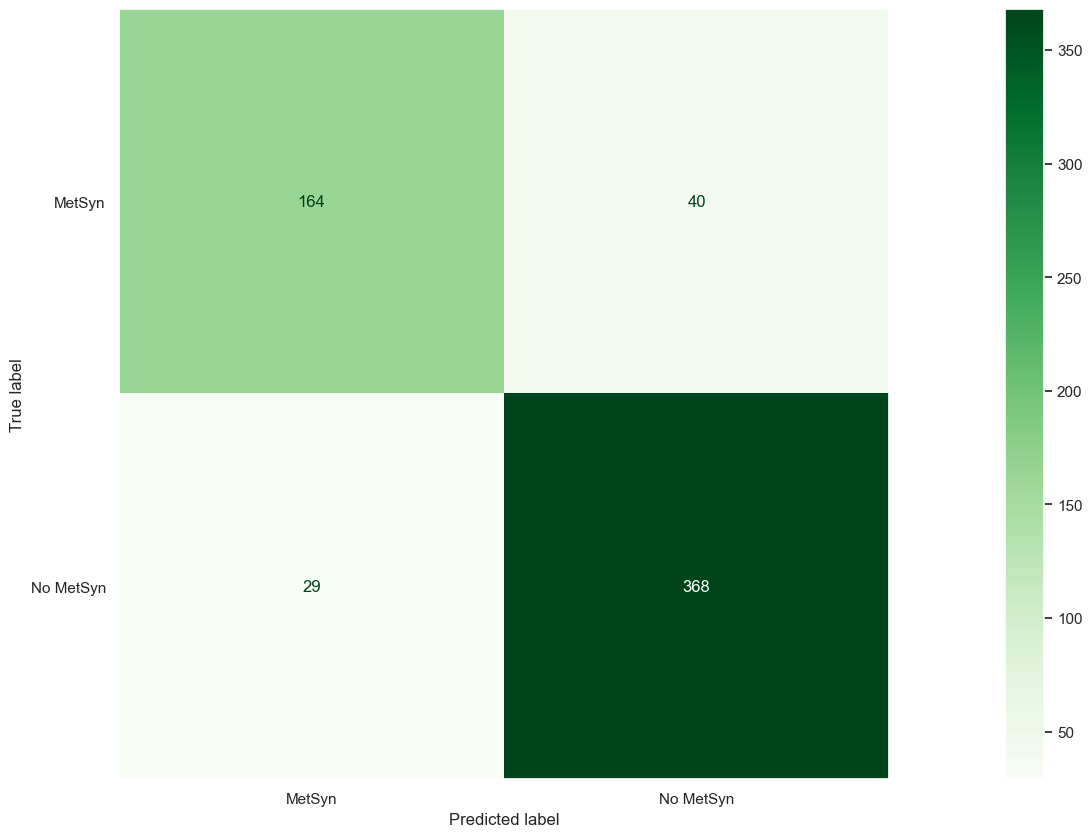

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boost_pipe, X_test, y_test, cmap='Greens')
plt.grid(False);

### Random Forest had the best accuracy and confusion matrix from the rest of the other models. It was a relief to see 38 negative negatives in the plot. I don't like ti but I am sure you can run another code to help with this set. Right now I have a 86% accuracy and that is a lot better than the regular 81 I was getting before.